<a href="https://colab.research.google.com/github/Andreher00/ml-project/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Reading mouse brain dataset

In [6]:
data = pd.read_csv('/content/drive/MyDrive/progettoML/brain_counts.csv.gz')
annotations = pd.read_csv('/content/drive/MyDrive/progettoML/brain_metadata.csv')

In [7]:
annotations["cell_ontology_class"].value_counts()

oligodendrocyte                   1574
endothelial cell                   715
astrocyte                          432
neuron                             281
oligodendrocyte precursor cell     203
brain pericyte                     156
Bergmann glial cell                 40
Name: cell_ontology_class, dtype: int64

In [8]:
data.shape

(3401, 23434)

In [9]:
data.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,0,195,0,0,113,0
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,0,125,0,1,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [10]:
annotations.head()

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [11]:
data.index = data['Unnamed: 0']

In [12]:
data = data.drop('Unnamed: 0', axis=1)
# change index name to cell
data.index.name = 'cell'

In [13]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,0,195,0,0,113,0
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,0,125,0,1,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [14]:
annotations.index = annotations["cell"]

In [15]:
annotations = annotations.drop('cell', axis=1)

In [16]:
annotations = annotations["cell_ontology_class"]

In [17]:
annotations

cell
A1.B003290.3_38_F.1.1                           astrocyte
A1.B003728.3_56_F.1.1                           astrocyte
A1.MAA000560.3_10_M.1.1                   oligodendrocyte
A1.MAA000564.3_10_M.1.1                  endothelial cell
A1.MAA000923.3_9_M.1.1                          astrocyte
                                        ...              
P9.MAA000926.3_9_M.1.1     oligodendrocyte precursor cell
P9.MAA000930.3_8_M.1.1                          astrocyte
P9.MAA000932.3_11_M.1.1                  endothelial cell
P9.MAA000935.3_8_M.1.1                    oligodendrocyte
P9.MAA001894.3_39_F.1.1                         astrocyte
Name: cell_ontology_class, Length: 3401, dtype: object

In [18]:
data = data.join(annotations, how='inner')

In [19]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cell_ontology_class
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,0,astrocyte
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,astrocyte
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,195,0,0,113,0,oligodendrocyte
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,125,0,1,0,0,0,endothelial cell
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,0,astrocyte


In [20]:
X = data.drop('cell_ontology_class', axis=1)
y = data['cell_ontology_class']

In [21]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cell_ontology_class
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,0,astrocyte
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,astrocyte
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,195,0,0,113,0,oligodendrocyte
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,125,0,1,0,0,0,endothelial cell
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,0,astrocyte


In [24]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)


# PIPELINE SVM

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pca = PCA(n_components=50)
scaler = StandardScaler()
svm = SVC()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('svm', svm)])

param_grid = {
	"svm__C": [0.01, 0.05, 0.1],
	"svm__kernel": ["linear", "rbf", "poly"],
	# "svm__degree": range(2, 6), # degree for polynomial kernel
	"svm__class_weight": [None, "balanced"]
}


In [49]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=50)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.05, 0.1],
                         'svm__class_weight': [None, 'balanced'],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [50]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.952):
{'svm__C': 0.05, 'svm__class_weight': None, 'svm__kernel': 'linear'}


In [51]:
grid.score(X_test, y_test)

0.9529964747356052

In [52]:
estimator = grid.best_estimator_

0.9535035081110477
                                precision    recall  f1-score   support

           Bergmann glial cell       0.65      0.79      0.71        14
                     astrocyte       0.97      0.90      0.93       108
                brain pericyte       0.87      1.00      0.93        39
              endothelial cell       0.97      0.97      0.97       190
                        neuron       0.90      0.99      0.94        74
               oligodendrocyte       0.97      0.95      0.96       377
oligodendrocyte precursor cell       0.96      0.94      0.95        49

                      accuracy                           0.95       851
                     macro avg       0.90      0.93      0.91       851
                  weighted avg       0.96      0.95      0.95       851



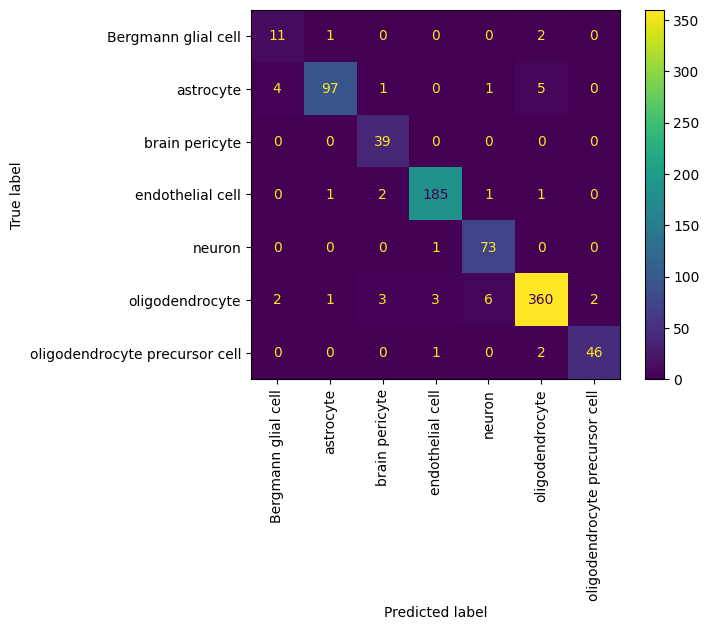

In [53]:
y_pred = estimator.predict(X_test)
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, classification_report
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')

# PIPELINE RANDOM FOREST

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pca = PCA()
scaler = StandardScaler()
rfc = RandomForestClassifier()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('rfc', rfc)])

param_grid = {
    "pca__n_components": [30, 50, 100],
    "rfc__n_estimators": [100, 150, 200],
    "rfc__class_weight": [None, "balanced"]
}

In [55]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [30, 50, 100],
                         'rfc__class_weight': [None, 'balanced'],
                         'rfc__n_estimators': [100, 150, 200]},
             verbose=3)

In [56]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.954):
{'pca__n_components': 50, 'rfc__class_weight': 'balanced', 'rfc__n_estimators': 200}


In [57]:
grid.score(X_test, y_test)

0.9506462984723855

In [58]:
estimator = grid.best_estimator_

In [66]:
y_pred = estimator.predict(X_test)
from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test,y_pred))

0.9504411026683639
                                precision    recall  f1-score   support

           Bergmann glial cell       0.91      0.71      0.80        14
                     astrocyte       0.94      0.93      0.93       108
                brain pericyte       0.95      0.92      0.94        39
              endothelial cell       0.98      0.95      0.96       190
                        neuron       0.89      0.99      0.94        74
               oligodendrocyte       0.96      0.97      0.96       377
oligodendrocyte precursor cell       0.94      0.94      0.94        49

                      accuracy                           0.95       851
                     macro avg       0.94      0.91      0.92       851
                  weighted avg       0.95      0.95      0.95       851



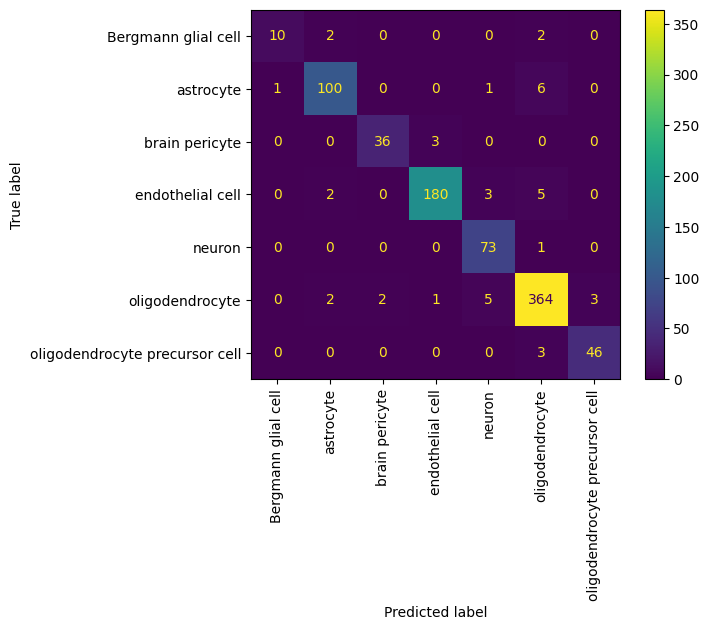

In [60]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')

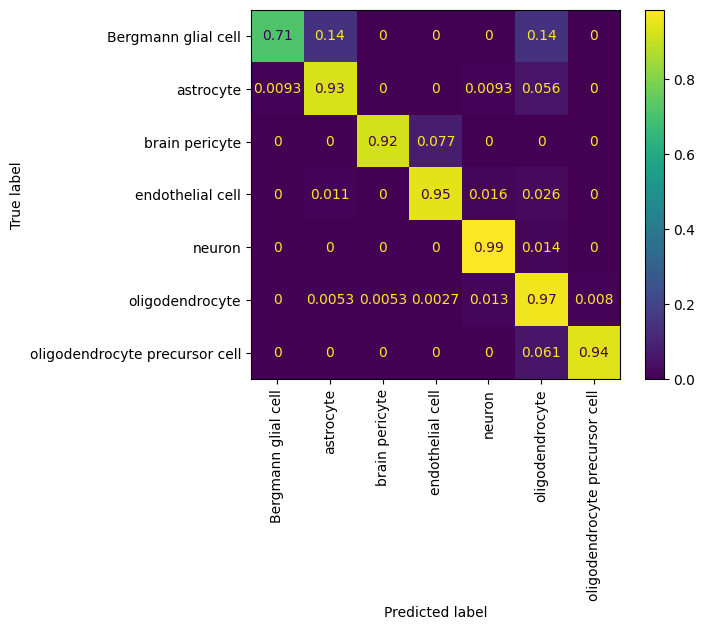

In [61]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical', normalize='true')